In [31]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
from matplotlib import cm
#import itertools
from numpy.linalg import inv
import random
import math


## WZ term to be calculated 

In [33]:
#Symmetrized random matrix, random values are fix by seed module 
# here the constant random matrix in--- random numbers in the range [0.0,1.0)
np.random.seed(42)
H_const = np.round(np.random.random(size=(2, 2)),2)
print(H_const)
#[[0.37 0.95]
# [0.73 0.6 ]]

# C_4 symmetry operator:
sigma_y = np.zeros((2,2), dtype=np.complex128)
sigma_y[0][1] += -1j
sigma_y[1][0] += 1j
U = -1j*sigma_y


once = np.matmul(H_const.conj().T,U)
twice = np.matmul(np.matmul(inv(U),H_const),U)
three_times = np.matmul(np.matmul(np.matmul(inv(U),H_const.conj().T),U),U)
H_C4 = H_const + once + twice + three_times
print('C_4 symmetrized random matrix:')
print(H_C4)
# to control if the matrix is invariant under four-fold-type rotation
print('rotating once forward:')
rotate_it = np.matmul(U,H_C4.conj().T)
print(np.allclose(rotate_it,H_C4))
print('rotating twice forward:')
once_more = np.matmul(U,rotate_it.conj().T)
print(np.allclose(once_more,H_C4))

Bloch_diff_lambda = np.zeros((len(lambdda),2,2), dtype=np.complex128)
#print(Bloch_diff_lambda)

[[0.37 0.95]
 [0.73 0.6 ]]
C_4 symmetrized random matrix:
[[ 0.75+0.j -0.75+0.j]
 [ 0.75+0.j  0.75+0.j]]
rotating once forward:
True
rotating twice forward:
True


In [10]:
%matplotlib qt5
n=100
k_x = np.linspace(0,2*np.pi,n)
k_y = np.linspace(0,2*np.pi,n)
gamma=0.5
lamb=1


def eig_(M, sortby = 'real'):
    """ Returns the eigenvalues, eigenvectors (left and right if the matrix is
    non-symmetric) of a matrix M in an ascending order. sortby = 'real', 'imag' or 'abs'. """
    if np.allclose(M, M.T.conj()):
        evals, evecs = la.eig(M)
        sort_p = (evals.real).argsort()
        evals=evals[sort_p]
        evecs=evecs[:, sort_p]
        return evals, evecs
    else:
        evals, evecs_l, evecs_r = la.eig(M, left = True, right = True)
        if sortby == 'real':
           sort_p = (evals.real).argsort()
        elif sortby == 'imag':
           sort_p = (evals.imag).argsort()
        elif sortby == 'abs':
           sort_p = (np.abs(evals)).argsort()
        evals = evals[sort_p]
        evecs_r = evecs_r[:, sort_p]
        evecs_l = evecs_l[:, sort_p]
        return evals, evecs_l, evecs_r

def eigenvalue(k_x,k_y,lamb,gamma):
    Z=np.zeros((n, n))
    Z2=np.zeros((n, n))
    
    for i in range(len(k_x)):
        for k in range(len(k_y)):

            H1 = [[-1j*gamma, -1j*gamma], 
                    [1j*gamma, -1j*gamma]]

            H2 = [[-1j*lamb*np.cos(k_x[i][k]), -1j*lamb*np.cos(k_y[i][k])], 
                    [1j*lamb*np.cos(k_y[i][k]), -1j*lamb*np.cos(k_x[i][k])]]

            H3 = [[lamb*np.sin(k_x[i][k]), lamb*np.sin(k_y[i][k])], 
                    [lamb*np.sin(k_y[i][k]), -lamb*np.sin(k_x[i][k])]]

            #print(np.shape(H_pi))
            first2H = np.add(H1,H2)
            H=np.add(first2H,H3)

            results=eig_(H)
            if len(results)==2:
                Z[i][k]= results[0][0].real
                Z2[i][k]=results[0][1].real
            else:
                Z[i][k]= results[0][0].real
                Z2[i][k]=results[0][1].real
    return Z, Z2


X, Y = np.meshgrid(k_x, k_y)
Z,Z2 = eigenvalue(X,Y,lamb,gamma)  # this are the eigenvalues w.r.t. real part of the energies 

Z_min = np.max(Z)
Z2_min = np.min(Z2)
print(Z_min, Z2_min)

# calculate the upper and lower spectra with different lambdas 
n_lamb = 41
lambdda= np.linspace(-2,2,n_lamb) # now for various lambda 
gamma_list = np.linspace(-2,2,n_lamb)
diffs = np.zeros((n_lamb,n_lamb))
diffs.shape
diffs[3,4]

-0.5005032044021445 0.5005032044021445


0.0

In [11]:
w1=0
w2=0
for gamma in gamma_list:
    w2=0
    for lamb in lambdda:
        Z,Z2 = eigenvalue(X,Y,lamb,gamma)
        Z_min = np.max(Z)
        Z2_min = np.min(Z2)
        difference = abs(Z2_min-Z_min)
        diffs[w1,w2] += difference # const gamma is along the rows and const lambda along columns
        w2 += 1
    w1+=1
print(diffs)

[[1.26927711e-01 2.35170388e-01 4.17731468e-01 ... 4.00000000e-01
  2.00000000e-01 0.00000000e+00]
 [2.35170388e-01 1.20581325e-01 2.31893511e-01 ... 2.00000000e-01
  8.88178420e-16 2.00000000e-01]
 [4.17731468e-01 2.31893511e-01 1.14234940e-01 ... 4.44089210e-16
  2.00000000e-01 4.00000000e-01]
 ...
 [4.00000000e-01 2.00000000e-01 4.44089210e-16 ... 1.14234940e-01
  2.31893511e-01 4.17731468e-01]
 [2.00000000e-01 8.88178420e-16 2.00000000e-01 ... 2.31893511e-01
  1.20581325e-01 2.35170388e-01]
 [0.00000000e+00 2.00000000e-01 4.00000000e-01 ... 4.17731468e-01
  2.35170388e-01 1.26927711e-01]]


In [27]:
#print the diffs here so that I dont have to calculate again
diffs_for_later_use = diffs
print(diffs.shape)
diffs = np.reshape(diffs, n_lamb*n_lamb)
print(diffs.shape)

(1, 1681)
(1681,)


<IPython.core.display.Javascript object>


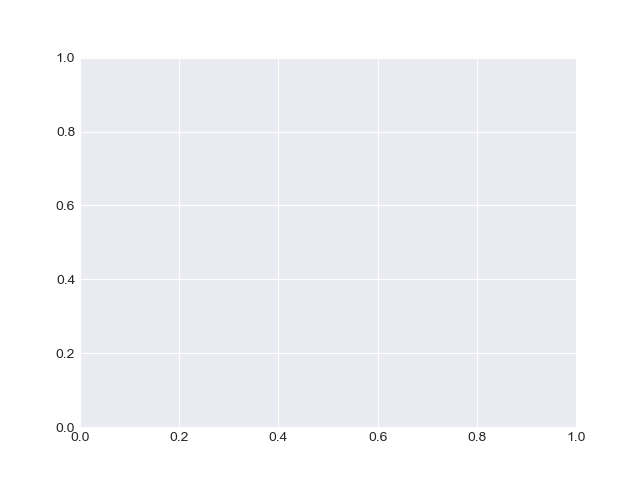

ValueError: 'c' argument has 1681 elements, which is not acceptable for use with 'x' with size 1681, 'y' with size 1681.

In [30]:
%matplotlib qt5
lambda_forplot = np.linspace(2,-2,n_lamb)
plt.style.use('seaborn-darkgrid')
gammalambda_list = np.zeros((n_lamb,n_lamb))
#X, Y = np.meshgrid(gamma_list, lambdda)

plt.scatter(X, Y, s=10, c=diffs, cmap='viridis')
plt.title('phase diagram $\lambda\in [-2,2]$ and $\gamma \in [-2,2]$ colormap by the gap size')
plt.colorbar()
plt.xlabel('$\lambda$ values')
plt.ylabel('WZ integral')
#plt.xlim([-6,6])
#plt.ylim([-0.7, 0.7])
plt.show()


In [ ]:
# WZ integral for various bloch matrices depending on lambdas 

n_k=60 # number of steps 
k_x = np.linspace(0,2*np.pi,n_k, endpoint=False)
k_y = np.linspace(0,2*np.pi,n_k, endpoint=False)
gamma=0.5
n_lamb = 41
lambdda= np.linspace(-2,2,n_lamb)
H = np.zeros((2,2), dtype=np.complex128)
n_t = n_k # number of steps 
t = np.linspace(0,1,n_t)
print(k_x)


def Bloch(kx, ky, t, gamma, lamb):
    H[0][0] = -1j*gamma-1j*np.cos(kx)+lamb*np.sin(kx)
    H[0][1] = -1j*gamma-1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][0] = 1j*gamma+1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][1] = -1j*gamma-1j*np.cos(kx)-lamb*np.sin(kx)
    H_WZ = H*(1-t)+sigma_z*t
    return H_WZ

def H1(kx, ky, t, gamma, lamb):
    H[0][0] = (1-t)*(1j*np.sin(kx)+lamb*np.cos(kx))
    H[0][1] = 0
    H[1][0] = 0
    H[1][1] = (1-t)*(1j*np.sin(kx)-lamb*np.cos(kx))
    return H

def H2(kx, ky, t, gamma, lamb):
    H[0][0] = 0
    H[0][1] = (1-t)*(1j*lamb*np.sin(ky)+lamb*np.cos(ky))
    H[1][0] = (1-t)*(-1j*lamb*np.sin(ky)+lamb*np.cos(ky))
    H[1][1] = 0
    return H

def H3(kx, ky, t, gamma, lamb):
    H[0][0] = -1j*gamma-1j*np.cos(kx)+lamb*np.sin(kx)
    H[0][1] = -1j*gamma-1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][0] = 1j*gamma+1j*lamb*np.cos(ky)+lamb*np.sin(ky)
    H[1][1] = -1j*gamma-1j*np.cos(kx)-lamb*np.sin(kx)
    dt_H_WZ = - H + sigma_z
    return dt_H_WZ

varying_lambda_integ = np.zeros(n_lamb, dtype=np.complex128)
s=0
for lamb in lambdda:
    integ_t = 0
    integ = 0
    for m in range(n_k):
        for j in range(n_k):
            for i in range(n_k):
                #--------------------------------------------matrix multiplcation for the matrices for trace----
                Hinv = inv(Bloch(k_x[i],k_y[j],t[m],gamma,lamb))

                first0 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb))
                second0 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb))
                third0 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb))
                first_two0 = np.matmul(first0,second0)
                last_multi0 = np.matmul(first_two0,third0) 

                first1 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb))
                second1 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb))
                third1 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb))
                first_two1 = np.matmul(first1,second1)
                last_multi1 = np.matmul(first_two1,third1) 

                first2 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb))
                second2 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb))
                third2 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb))
                first_two2 = np.matmul(first2,second2)
                last_multi2 = np.matmul(first_two2,third2) 

                first3 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb))
                second3 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb))
                third3 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb))
                first_two3 = np.matmul(first3,second3)
                last_multi3 = np.matmul(first_two3,third3) 

                first4 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb))
                second4 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb))
                third4 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb))
                first_two4 = np.matmul(first4,second4)
                last_multi4 = np.matmul(first_two4,third4) 

                first5 = np.matmul(Hinv,H3(k_x[i], k_y[j], t[m], gamma, lamb))
                second5 = np.matmul(Hinv,H2(k_x[i], k_y[j], t[m], gamma, lamb))
                third5 = np.matmul(Hinv,H1(k_x[i], k_y[j], t[m], gamma, lamb))
                first_two5 = np.matmul(first5,second5)
                last_multi5 = np.matmul(first_two5,third5) 
                #-------------------------------------# trace of the multiplied matrices ------------------------
                epsilon0 = 1
                epsilon1 = -1
                epsilon2 = -1
                epsilon3 = 1
                epsilon4 = 1
                epsilon5 = -1
                trace0 = epsilon0*np.trace(last_multi0)
                trace1 = epsilon1*np.trace(last_multi1)
                trace2 = epsilon2*np.trace(last_multi2)
                trace3 = epsilon3*np.trace(last_multi3)
                trace4 = epsilon4*np.trace(last_multi4)
                trace5 = epsilon5*np.trace(last_multi5)
                trace = trace0 + trace1 + trace2 + trace3 + trace4 + trace5
                #print(trace)
                #------------------------------------------------------------------------------------------------

                """if i==0 or j==0 or m==0:
                    integ_t += trace/2
                elif i==n_k-1 or j == n_k-1 or m==n_k-1:
                    integ_t += trace/2
                else:
                    integ_t += trace"""
                integ_t += trace

    integ = integ_t*(2*np.pi)**2/(24*np.pi**2*n_k**3) # (2pi)^2/n_k^3; (2*np.pi)**2
    varying_lambda_integ[s] = integ
    s +=1

print('whole WZ integral:',integ) # (0.49995483203316116-1.7182326886531578e-18j) [0,1/2]

# H_const = sigma_y integral=(-0.5084069190606505+2.71307137635531e-20j)
# if H_const is C4 symmetric then the integral becomes (-2.053031899346136e-14+2.595160675888785j)

#print(varying_lambda_integ)
print(np.round(np.real(varying_lambda_integ),2))
print(lambdda)

[0.         0.10471976 0.20943951 0.31415927 0.41887902 0.52359878
 0.62831853 0.73303829 0.83775804 0.9424778  1.04719755 1.15191731
 1.25663706 1.36135682 1.46607657 1.57079633 1.67551608 1.78023584
 1.88495559 1.98967535 2.0943951  2.19911486 2.30383461 2.40855437
 2.51327412 2.61799388 2.72271363 2.82743339 2.93215314 3.0368729
 3.14159265 3.24631241 3.35103216 3.45575192 3.56047167 3.66519143
 3.76991118 3.87463094 3.97935069 4.08407045 4.1887902  4.29350996
 4.39822972 4.50294947 4.60766923 4.71238898 4.81710874 4.92182849
 5.02654825 5.131268   5.23598776 5.34070751 5.44542727 5.55014702
 5.65486678 5.75958653 5.86430629 5.96902604 6.0737458  6.17846555]


<IPython.core.display.Javascript object>


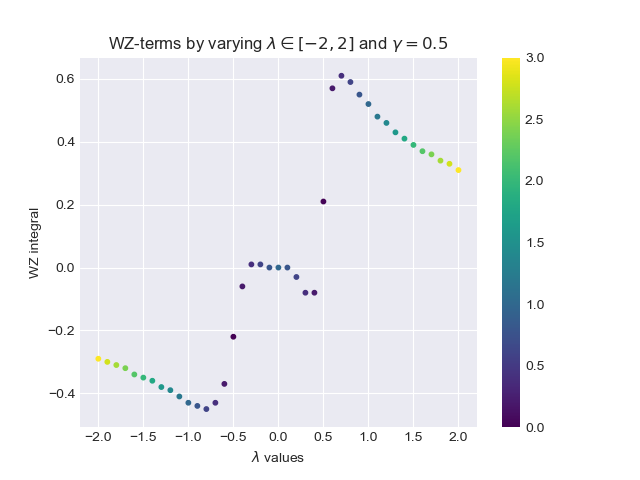

In [58]:
%matplotlib qt5

plt.style.use('seaborn-darkgrid')
plt.scatter(lambdda, np.round(np.real(varying_lambda_integ),2), s=10, c=diffs, cmap='viridis')
plt.title('WZ-terms by varying $\lambda\in [-2,2]$ and $\gamma=0.5$')
plt.colorbar()
plt.xlabel('$\lambda$ values')
plt.ylabel('WZ integral')
#plt.xlim([-6,6])
#plt.ylim([-0.7, 0.7])
plt.show()

In [17]:
f = 0
for s in range(n_lamb):
    for m in range(n_k):
        for j in range(n_k):
            for i in range(n_k):
                f+=1
print(f)

21970


<IPython.core.display.Javascript object>


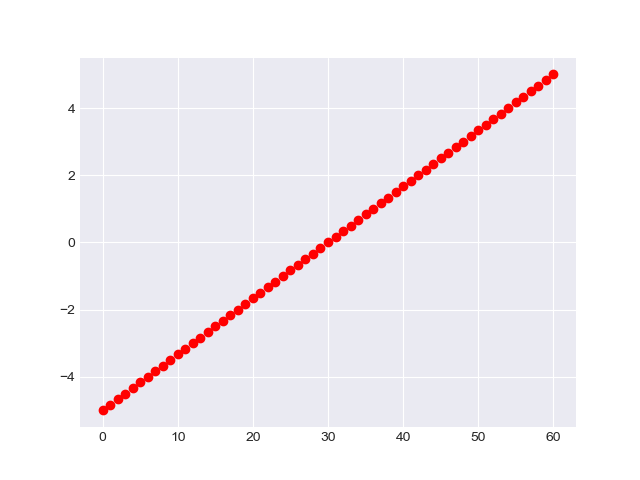

In [41]:
%matplotlib qt5
plt.plot(lambdda,'ro')
plt.show()